In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn .preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from mlxtend.plotting import plot_confusion_matrix

In [2]:
 ##load the data
df = pd.read_csv("winequality-white.csv")
df
##the aim of this study is to distinguish the quality of wine (quality column) regarding other factors.
##Thus it can be grouped together. 
##There are many approaches but through the report I will take into account different features. 
##The aim is to discover the best wine(range from 1 to 10).
##Which features have more impact? 


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [8]:
df['quality'].value_counts()
##the quality range from 1 to 10; however here we can see the values from 3 to 9. 
##there are signs of imbalanced data. Qualities 5 and 6 are the highest

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [12]:
df.groupby(['pH'])['quality'].value_counts()

pH    quality
2.72  6          1
2.74  6          1
2.77  6          1
2.79  5          3
2.80  6          2
                ..
3.77  5          2
3.79  5          1
3.80  6          2
3.81  6          1
3.82  7          1
Name: quality, Length: 382, dtype: int64

In [13]:
df.groupby(['alcohol'])['quality'].value_counts()
##all qualities have a similar amount of alcohol. 

alcohol  quality
8.00     3          1
         5          1
8.40     5          2
         4          1
8.50     6          4
                   ..
14.00    7          3
         6          1
         8          1
14.05    7          1
14.20    7          1
Name: quality, Length: 306, dtype: int64

In [16]:
df.groupby(['residual sugar'])['quality'].value_counts()

residual sugar  quality
0.60            5          2
0.70            5          3
                6          2
                3          1
                4          1
                          ..
22.60           5          1
23.50           5          1
26.05           6          2
31.60           6          2
65.80           6          1
Name: quality, Length: 800, dtype: int64

In [4]:
df.groupby(['total sulfur dioxide'])['quality'].value_counts()
##It can be seen that the quality of the wine decreases as total sulfur dioxide increases. 
##This is an inverse correlation

total sulfur dioxide  quality
9.0                   5          1
10.0                  4          1
18.0                  6          2
19.0                  3          1
21.0                  5          1
                                ..
307.5                 3          1
313.0                 5          1
344.0                 5          1
366.5                 3          1
440.0                 3          1
Name: quality, Length: 777, dtype: int64

In [38]:
corr_matrix = df.corr()
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


<AxesSubplot: >

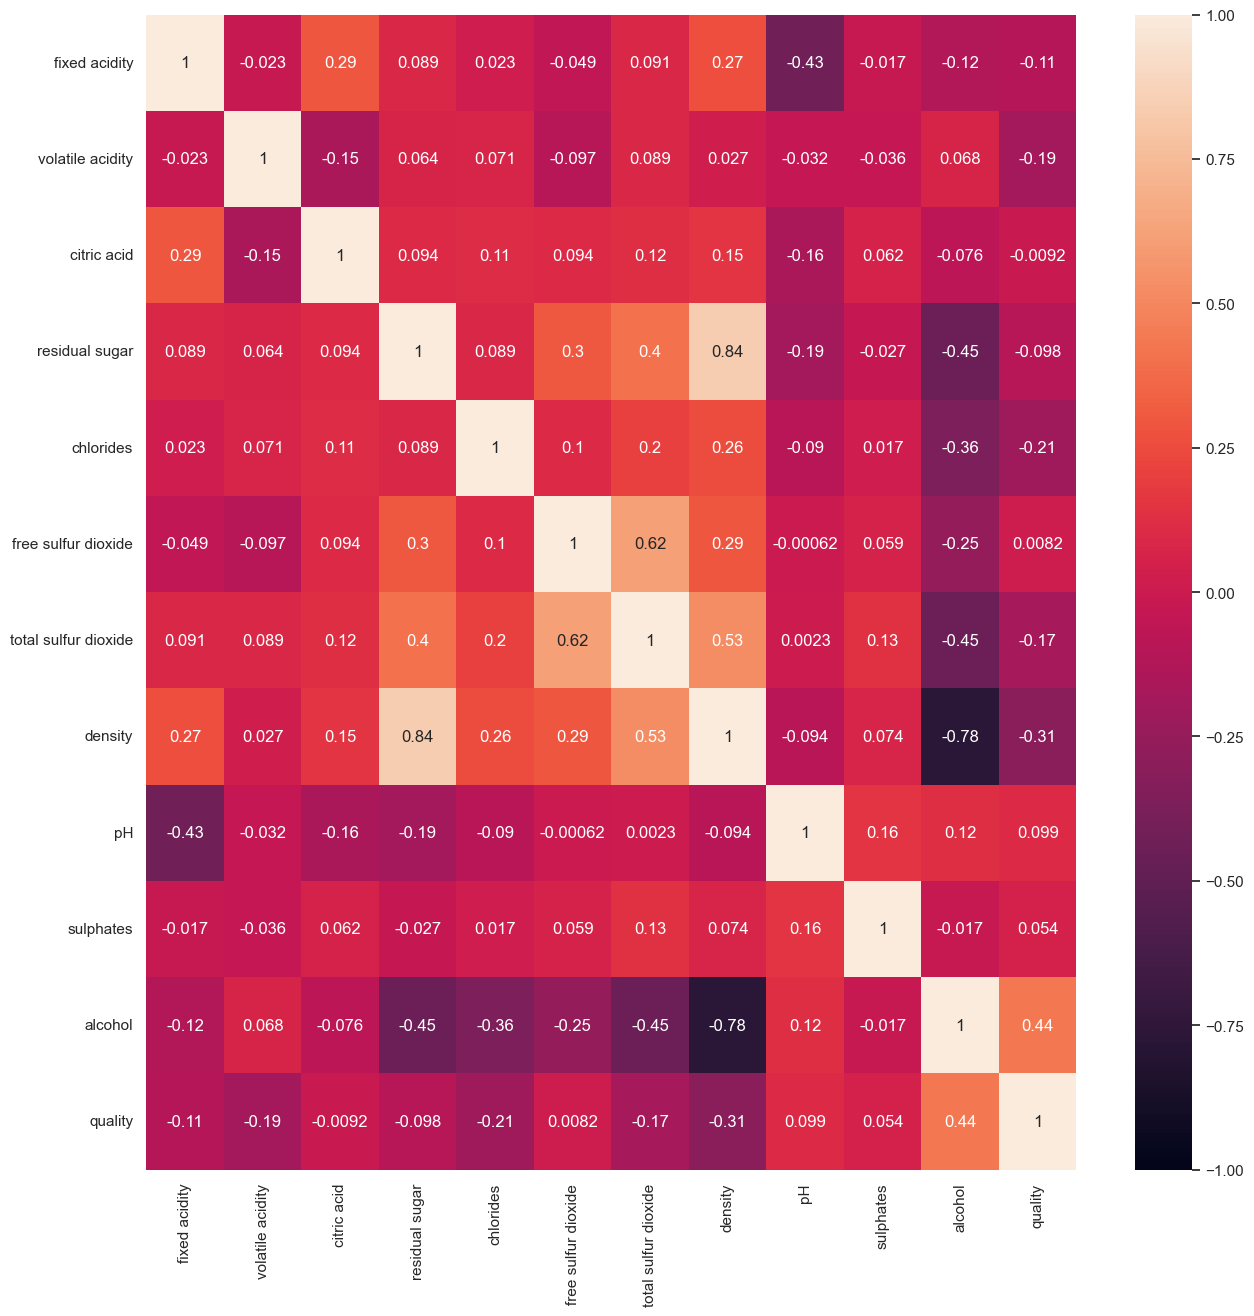

In [40]:
###visualization
##visualize the data 
## heatmap

plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1)

In [ ]:
##I have choosen quality to check the different relationships regarding wines. 
##Quality has more correlation with: density, alcohol, chlorides, total sulfur dioxide and volatile acidity.

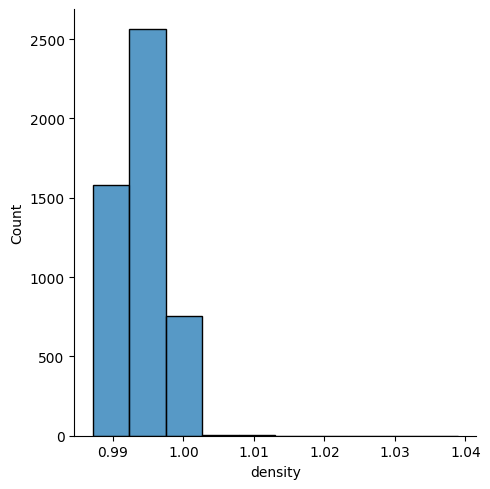

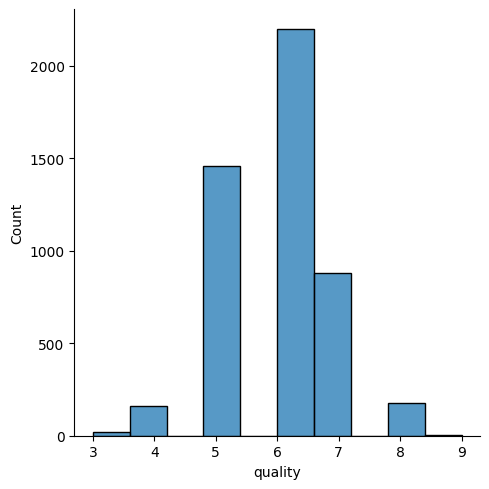

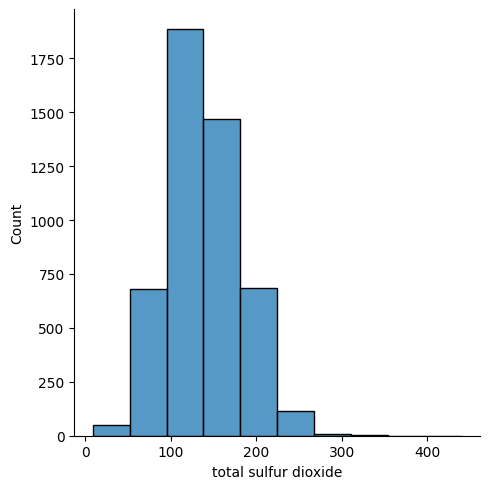

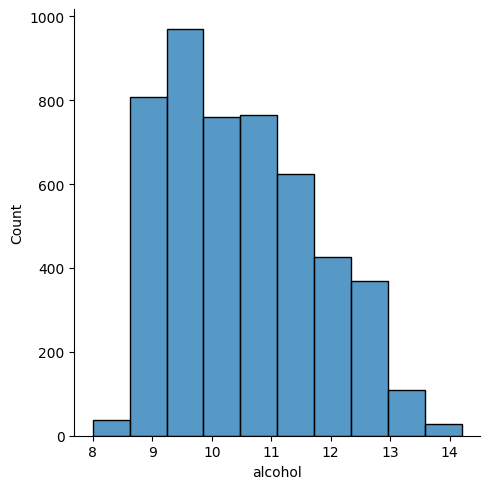

In [13]:
sns.displot(df['density'],bins=10,kde=False)
sns.displot(df['quality'],bins=10,kde=False)
sns.displot(df['total sulfur dioxide'],bins=10,kde=False)

sns.displot(df['alcohol'],bins=10,kde=False)

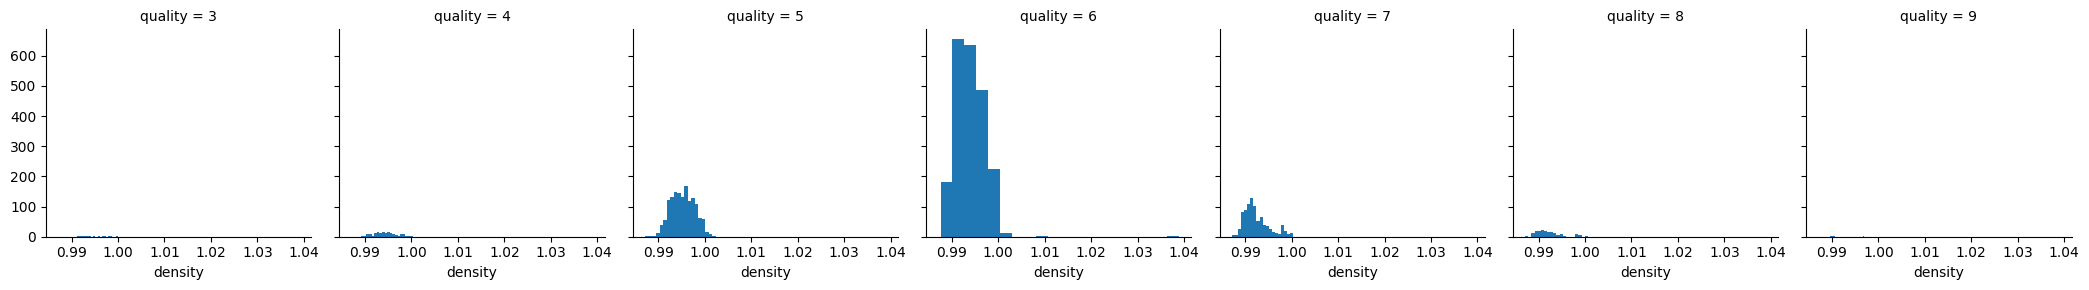

In [14]:
n= sns.FacetGrid(df, col='quality')
n.map(plt.hist, 'density', bins=20)
##Here we have a negative correlation as density increases the quality of wine decreases

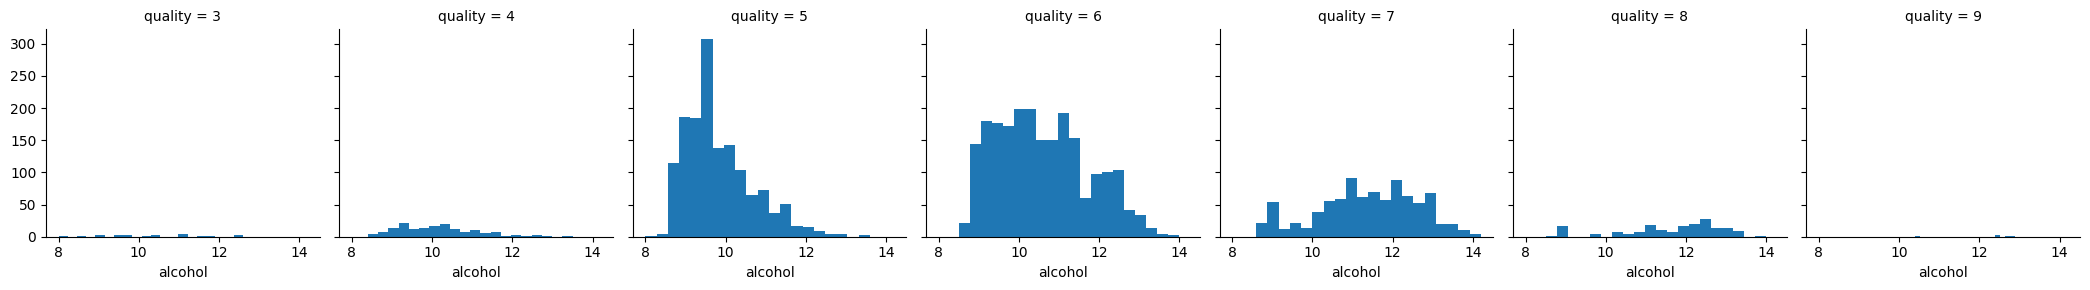

In [14]:
n= sns.FacetGrid(df, col='quality')
n.map(plt.hist, 'alcohol', bins=20)

## As alcohol increases the quality of the wine increases; however, the very high quality wines do not have alcohol.
##It can be said that is not accurate to say that less expensive wines have a lower content of alcohol. 

<AxesSubplot: xlabel='quality', ylabel='alcohol'>

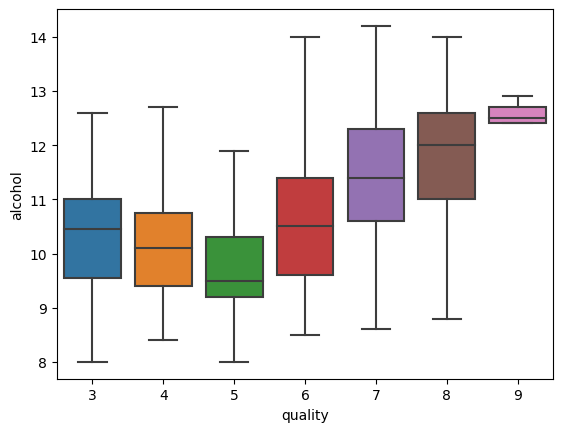

In [12]:
sns.boxplot(x='quality',y='alcohol', data = df, showfliers = False)

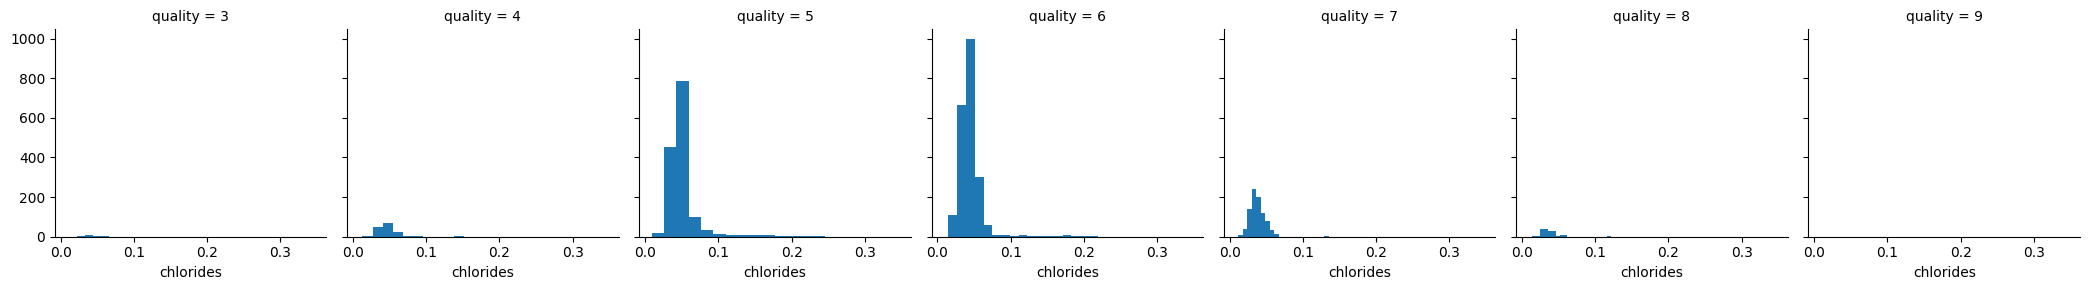

In [18]:
n= sns.FacetGrid(df, col='quality')
n.map(plt.hist, 'chlorides', bins=20)
##High quantities of chlorides are presented on quality 5 and 6. However, this can show us an imbalanced data. 


<AxesSubplot: xlabel='alcohol', ylabel='quality'>

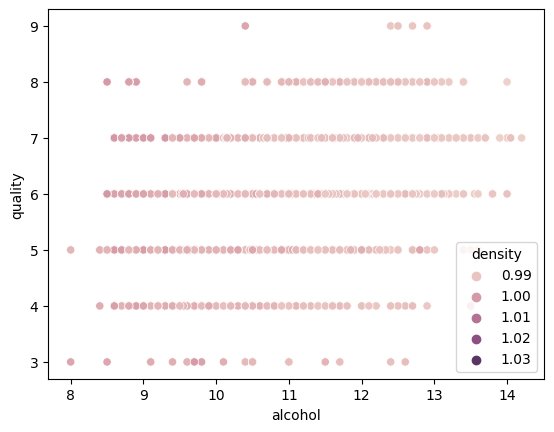

In [6]:
sns.scatterplot(x= df["alcohol"], y= df["quality"], hue= df['density'])

<AxesSubplot: xlabel='density', ylabel='total sulfur dioxide'>

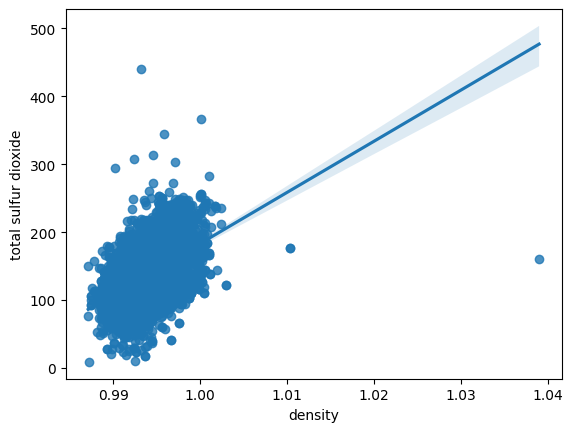

In [23]:
sns.regplot(x='density', y= 'total sulfur dioxide', data = df)
##positive correlation but not really high

<AxesSubplot: xlabel='quality', ylabel='fixed acidity'>

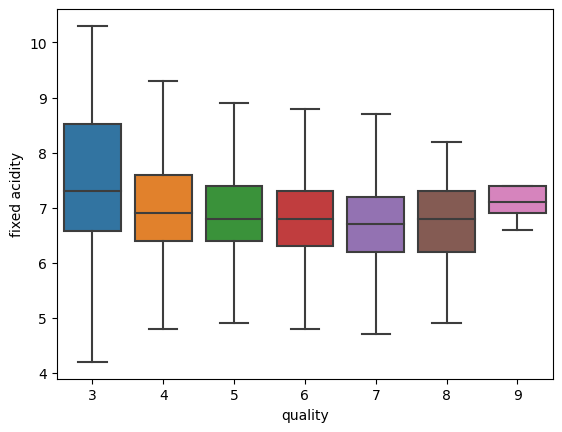

In [28]:
sns.boxplot(x='quality',y='fixed acidity', data = df, showfliers = False)
##high levels of fixed acidity are present for poor quality wines. 

In [ ]:
##Hierarchical clustering is an unsupervised learning method for clustering. 
##The algorithm builds clusters by measuring the dissimilarities between data. Unsupervised learning means that a model does not have to be trained and we do not need a target.
##hiercachical clustering can help you to detect patterns in your data even when you do not have a designated outcome variable.
### hierarchical clustering is less sesitive to outliers than some other clustering algorithms.This means that the presence 
##of a few outliers is not likely to affect the way the algorithm performs on the other data points. 


In [3]:
##Data Preprocessing 

##normalize and outliers 
#The data to have a clean data, so the model performs better on unseen data. Also, we need to deal with outliers

df_norm = normalize(df)
df_norm= pd.DataFrame(df_norm, columns=df.columns)
df_norm.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.039424,0.001521,0.002028,0.116583,0.000253,0.253440,0.957441,0.005638,0.016896,0.002534,0.049562,0.033792
1,0.047219,0.002249,0.002548,0.011992,0.000367,0.104932,0.989359,0.007450,0.024734,0.003673,0.071204,0.044971
2,0.078777,0.002723,0.003890,0.067107,0.000486,0.291767,0.943382,0.009678,0.031705,0.004279,0.098228,0.058353
3,0.037393,0.001195,0.001662,0.044145,0.000301,0.244095,0.965995,0.005171,0.016567,0.002077,0.051416,0.031161
4,0.037393,0.001195,0.001662,0.044145,0.000301,0.244095,0.965995,0.005171,0.016567,0.002077,0.051416,0.031161


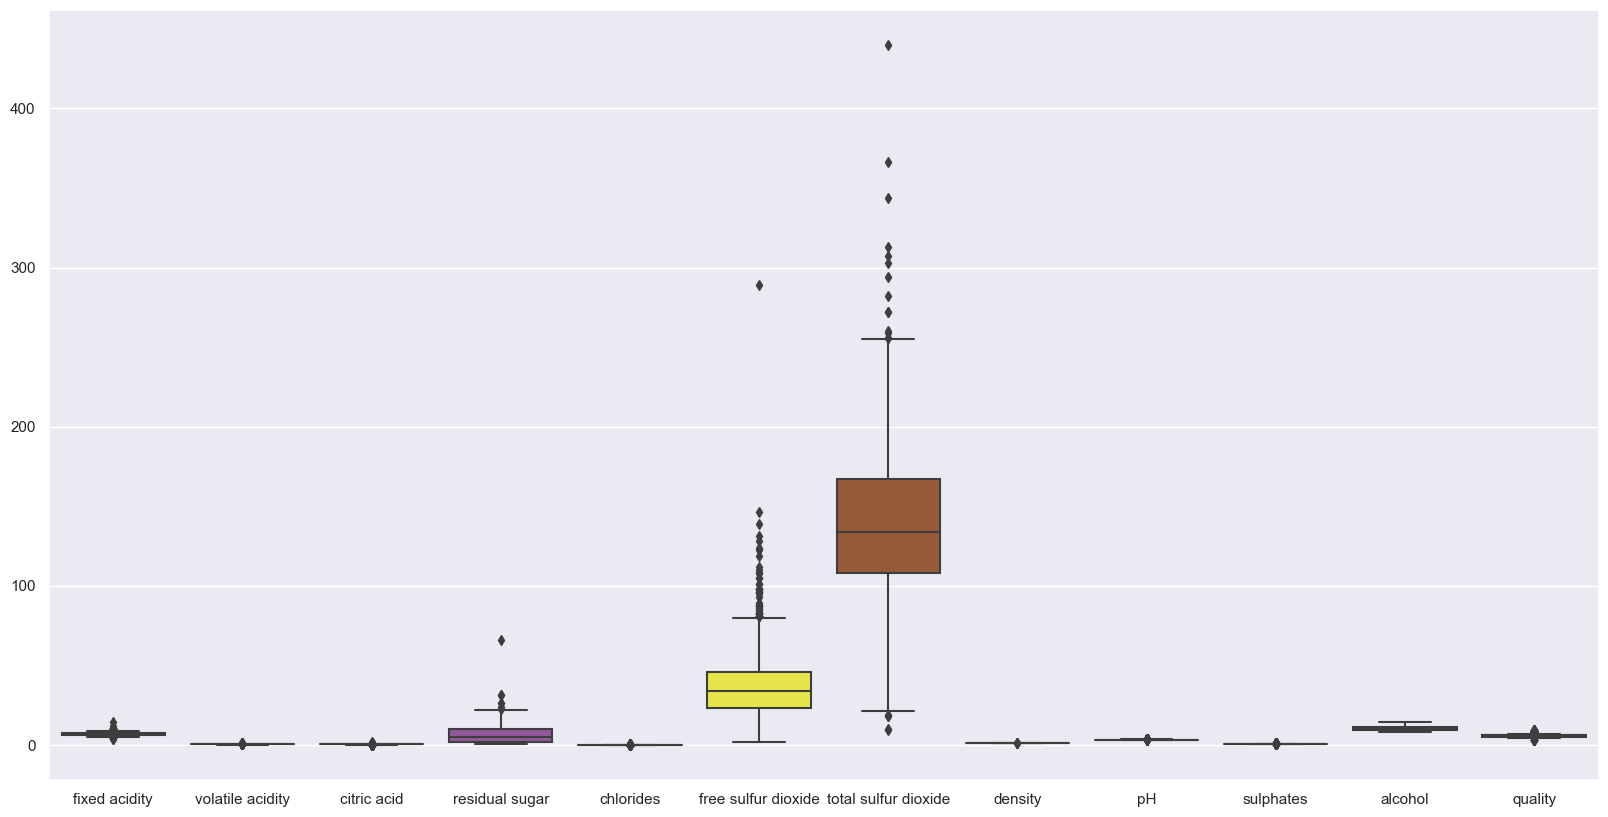

In [4]:
sns.set()
plt.figure(figsize=(20,10))
sns.boxplot(data=df,palette="Set1")
plt.show()

In [5]:
def find_boundaries(df, variables):
    Q1 =df[variables].quantile(.25)
    Q3=df[variables].quantile(.75)
    IQR =Q3-  Q1
    lower_boundy=Q1 -1.5*IQR
    upper_boundry=Q3 + 1.5*IQR
    return lower_boundy, upper_boundry

In [6]:
lower_limit,upper_limit = find_boundaries(df,"residual sugar")
print('upper limit for residual sugar are is' , upper_limit)
print("lower limit for residual sugar is" , lower_limit)

upper limit for residual sugar are is 22.200000000000003
lower limit for residual sugar is -10.600000000000001


In [7]:
outliers_df=np.where(df["residual sugar"]) > upper_limit,True,
np.where(df["residual sugar"]< lower_limit, True, False)

array([False, False, False, ..., False, False, False])

In [8]:
##capping
df["residual sugar"] =np.where(df["residual sugar"]> upper_limit,upper_limit,
                              np.where(df["residual sugar"]< lower_limit,lower_limit, df["residual sugar"]))

In [9]:
lower_limit,upper_limit = find_boundaries(df,"free sulfur dioxide")
print('upper limit for free sulfur dioxide are is' , upper_limit)
print("lower limit for free sulfur dioxide is" , lower_limit)

upper limit for free sulfur dioxide are is 80.5
lower limit for free sulfur dioxide is -11.5


In [10]:
outliers_df=np.where(df["free sulfur dioxide"]) > upper_limit,True,
np.where(df["free sulfur dioxide"]< lower_limit, True, False)

array([False, False, False, ..., False, False, False])

In [11]:
##capping
df["free sulfur dioxide"] =np.where(df["free sulfur dioxide"]> upper_limit,upper_limit,
                              np.where(df["free sulfur dioxide"]< lower_limit,lower_limit, df["free sulfur dioxide"]))

In [12]:
lower_limit,upper_limit = find_boundaries(df,"total sulfur dioxide")
print('upper limit for total sulfur dioxide are is' , upper_limit)
print("lower limit for total sulfur dioxide is" , lower_limit)

upper limit for total sulfur dioxide are is 255.5
lower limit for total sulfur dioxide is 19.5


In [13]:
outliers_df=np.where(df["total sulfur dioxide"]) > upper_limit,True,
np.where(df["total sulfur dioxide"]< lower_limit, True, False)

array([False, False, False, ..., False, False, False])

In [14]:
##capping
df["total sulfur dioxide"] =np.where(df["total sulfur dioxide"]> upper_limit,upper_limit,
                              np.where(df["total sulfur dioxide"]< lower_limit,lower_limit, df["total sulfur dioxide"]))

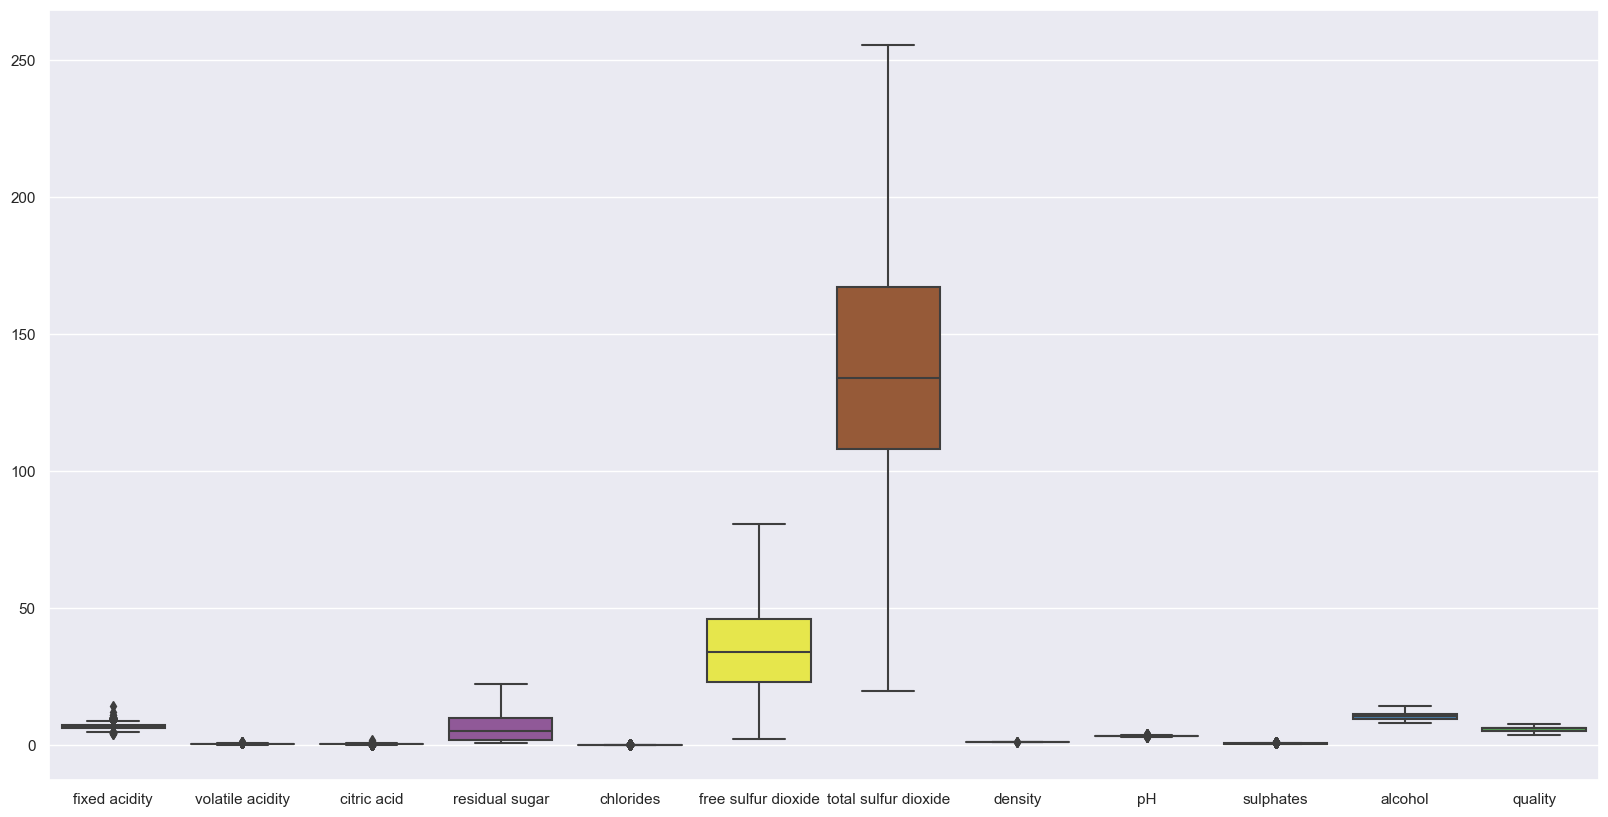

In [40]:
sns.set()
plt.figure(figsize=(20,10))
sns.boxplot(data=df,palette="Set1")
plt.show()

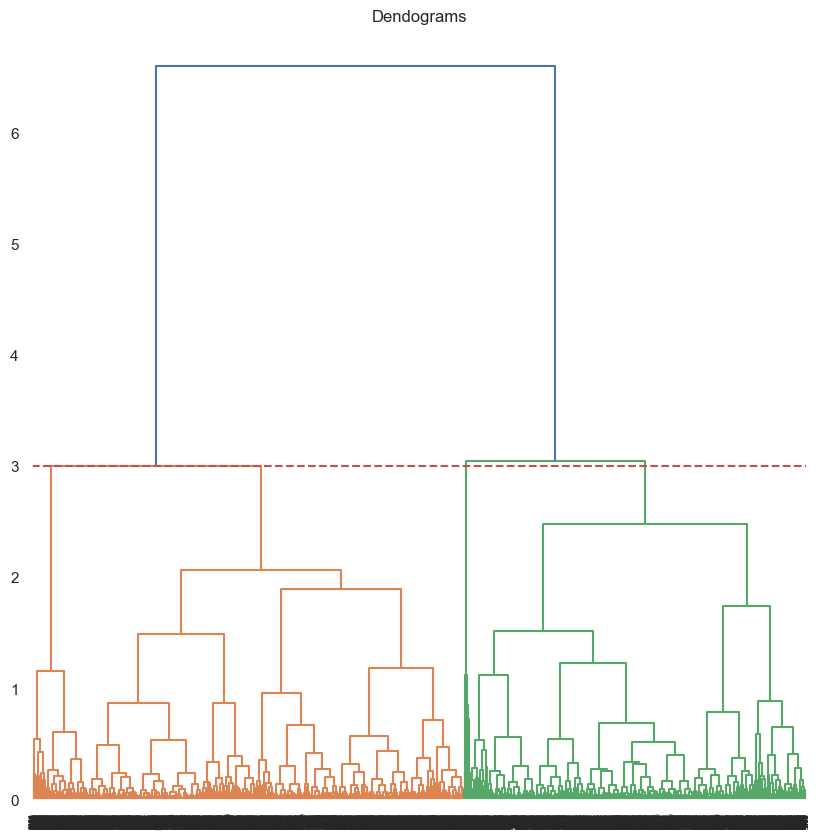

In [24]:
##create a dendrogram
plt.figure(figsize=(10,10))
plt.title('Dendrograms')
dend= shc.dendrogram(shc.linkage(df_norm, method='ward'))
plt.axhline(y=3, color='r', linestyle='--')
###check for the largest distance vertically without crossing any horizontal line.

In [25]:
## train model 
cluster = AgglomerativeClustering(n_clusters=2, affinity= 'euclidean', linkage='ward')
### afinjity help me to calculate the distance before we merge . it can be tried different clusters number or linkage
##now I can fit 
cluster.fit_predict(df_norm)

c:\Users\brill\OneDrive\Desktop\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

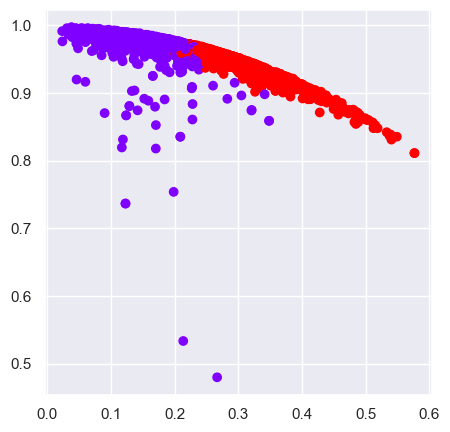

In [26]:
plt.figure(figsize=(5,5))
plt.scatter(df_norm['free sulfur dioxide'], df_norm['total sulfur dioxide'], c=cluster.labels_,cmap='rainbow')

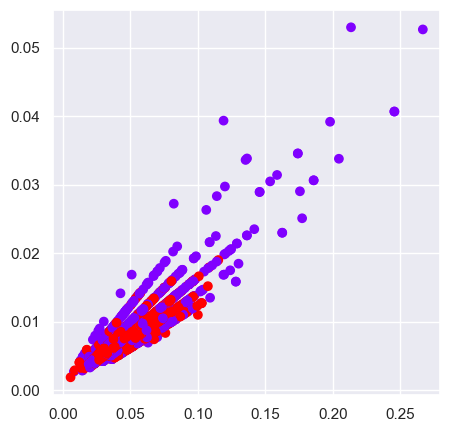

In [27]:
plt.figure(figsize=(5,5))
plt.scatter(df_norm['quality'], df_norm['density'], c=cluster.labels_,cmap='rainbow')

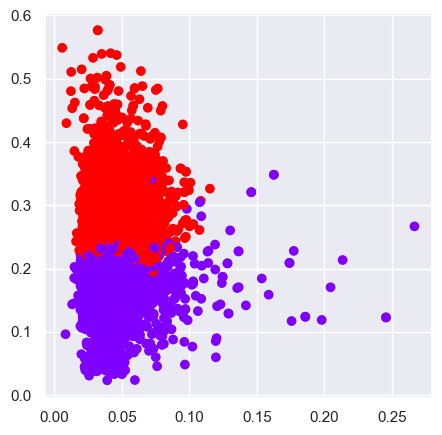

In [28]:
plt.figure(figsize=(5,5))
plt.scatter(df_norm['quality'], df_norm['free sulfur dioxide'], c=cluster.labels_,cmap='rainbow')

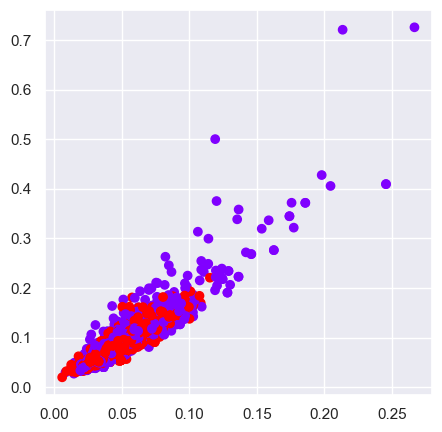

In [42]:
plt.figure(figsize=(5,5))
plt.scatter(df_norm['quality'], df_norm['alcohol'], c=cluster.labels_,cmap='rainbow')